<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-09 17:26:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.11’

survey-data.csv.11  100%[===================>] 152.13M  57.2MB/s    in 2.7s    

2025-09-09 17:26:41 (57.2 MB/s) - ‘survey-data.csv.11’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


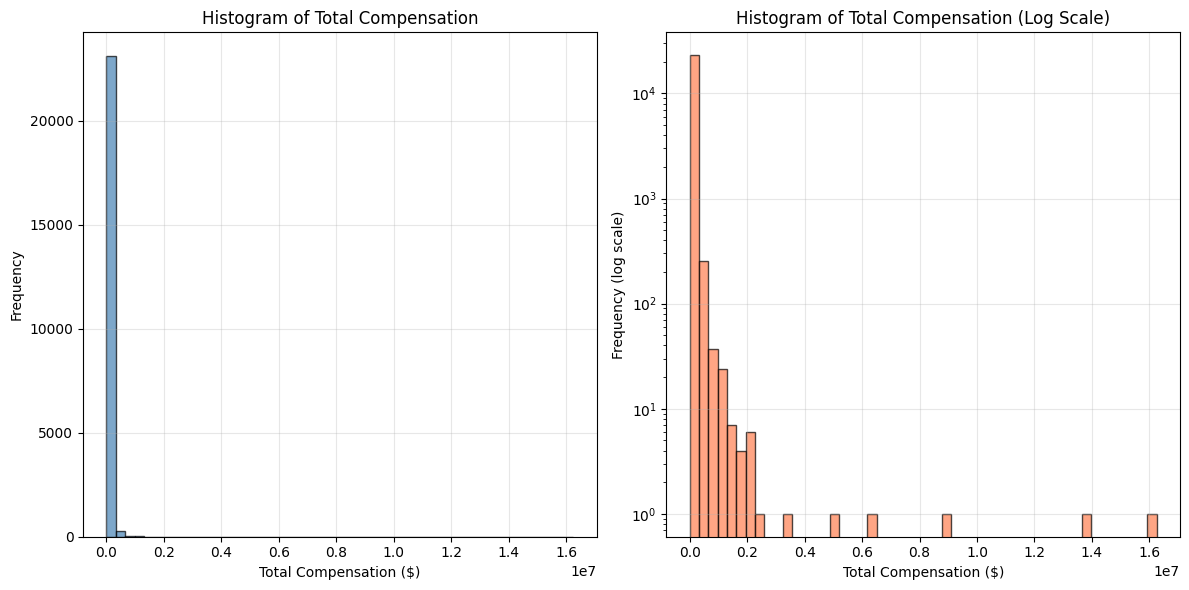

Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: CompTotal, dtype: float64

Skewness: 52.922


In [19]:
# Plot a histogram of CompTotal (Total Compensation)
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get CompTotal data
QUERY = """
SELECT ConvertedCompYearly as CompTotal
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
comp_data = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Create histogram
plt.figure(figsize=(12, 6))

# Plot 1: Regular histogram
plt.subplot(1, 2, 1)
plt.hist(comp_data['CompTotal'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Histogram of Total Compensation')
plt.xlabel('Total Compensation ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Plot 2: Log-scale histogram (to better see the distribution despite outliers)
plt.subplot(1, 2, 2)
plt.hist(comp_data['CompTotal'], bins=50, alpha=0.7, color='coral', edgecolor='black', log=True)
plt.title('Histogram of Total Compensation (Log Scale)')
plt.xlabel('Total Compensation ($)')
plt.ylabel('Frequency (log scale)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display basic statistics
print("Compensation Statistics:")
print(comp_data['CompTotal'].describe())

# Show the skewness of the data
print(f"\nSkewness: {comp_data['CompTotal'].skew():.3f}")

**Box Plots**

Plot a box plot of Age.


([], [])

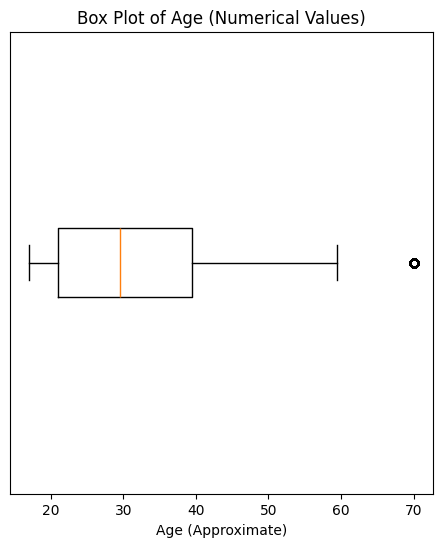

In [20]:
# Plot a box plot of Age
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get Age data
QUERY = """
SELECT Age FROM main WHERE Age IS NOT NULL
"""
age_data = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Map categorical age groups to numerical values for the box plot
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Create numerical age values
age_data['Age_Numeric'] = age_data['Age'].map(age_mapping)

# Create the box plot
plt.figure(figsize=(12, 6))

# Plot 1: Box plot with numerical values
plt.subplot(1, 2, 1)
plt.boxplot(age_data['Age_Numeric'].dropna(), vert=False)
plt.title('Box Plot of Age (Numerical Values)')
plt.xlabel('Age (Approximate)')
plt.yticks([])  # Remove y-axis ticks for single box plot


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


Original data points: 29658
Clean data points: 29611


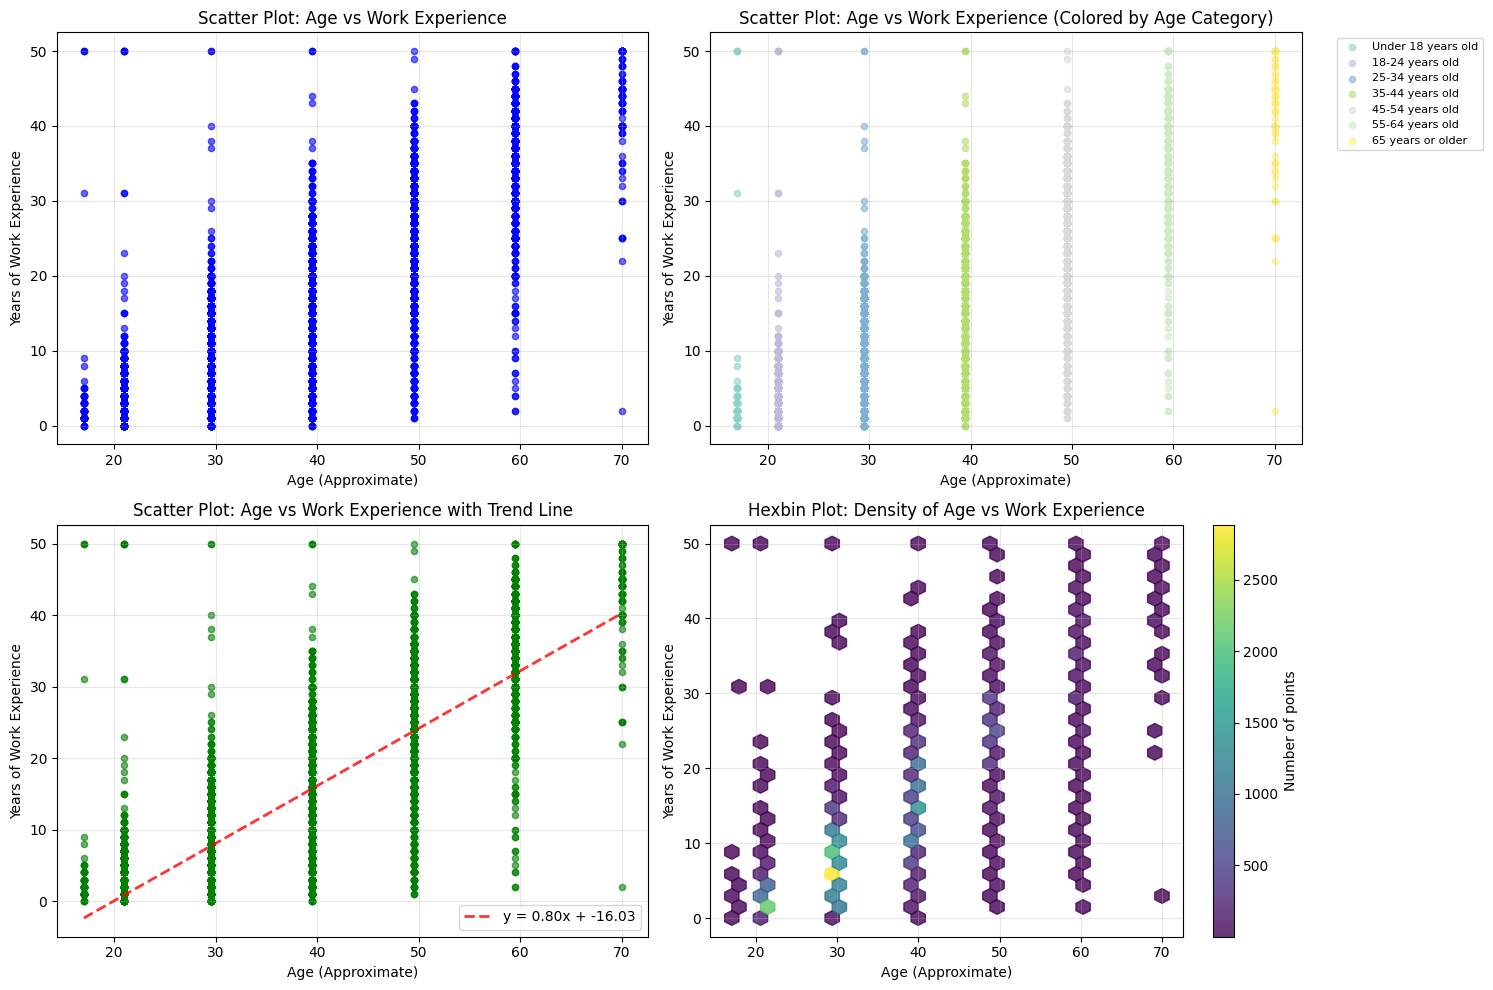

Correlation between Age and Work Experience: 0.851

Age Statistics:
count    29611.000000
mean        34.197764
std          9.688607
min         17.000000
25%         29.500000
50%         29.500000
75%         39.500000
max         70.000000
Name: Age_Numeric, dtype: float64

Work Experience Statistics:
count    29611.000000
mean        11.450204
std          9.149328
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         50.000000
Name: WorkExp, dtype: float64

Number of clean data points: 29611


In [21]:
# Create a scatter plot of Age and WorkExp with proper error handling
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get Age and WorkExp data
QUERY = """
SELECT Age, WorkExp 
FROM main 
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL
"""
data = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Map categorical age groups to numerical values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Create numerical age values
data['Age_Numeric'] = data['Age'].map(age_mapping)

# Clean the data - remove any remaining NaN or infinite values
data_clean = data.dropna(subset=['Age_Numeric', 'WorkExp']).copy()
data_clean = data_clean[np.isfinite(data_clean['Age_Numeric']) & np.isfinite(data_clean['WorkExp'])]

print(f"Original data points: {len(data)}")
print(f"Clean data points: {len(data_clean)}")

# Create the scatter plot
plt.figure(figsize=(15, 10))

# Basic scatter plot
plt.subplot(2, 2, 1)
plt.scatter(data_clean['Age_Numeric'], data_clean['WorkExp'], alpha=0.6, color='blue', s=20)
plt.title('Scatter Plot: Age vs Work Experience')
plt.xlabel('Age (Approximate)')
plt.ylabel('Years of Work Experience')
plt.grid(True, alpha=0.3)

# Scatter plot with color by age category
plt.subplot(2, 2, 2)
colors = plt.cm.Set3(np.linspace(0, 1, len(age_mapping)))
for i, (age_cat, age_val) in enumerate(age_mapping.items()):
    subset = data_clean[data_clean['Age'] == age_cat]
    if len(subset) > 0:  # Only plot if there are data points
        plt.scatter(subset['Age_Numeric'], subset['WorkExp'], alpha=0.6, 
                    color=colors[i], label=age_cat, s=20)
plt.title('Scatter Plot: Age vs Work Experience (Colored by Age Category)')
plt.xlabel('Age (Approximate)')
plt.ylabel('Years of Work Experience')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)

# Scatter plot with trend line (with proper error handling)
plt.subplot(2, 2, 3)
plt.scatter(data_clean['Age_Numeric'], data_clean['WorkExp'], alpha=0.6, color='green', s=20)

# Add trend line with error handling
try:
    if len(data_clean) > 1:  # Ensure we have enough data points
        z = np.polyfit(data_clean['Age_Numeric'], data_clean['WorkExp'], 1)
        p = np.poly1d(z)
        x_range = np.linspace(data_clean['Age_Numeric'].min(), data_clean['Age_Numeric'].max(), 100)
        plt.plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2, 
                label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
        plt.legend()
except Exception as e:
    print(f"Error creating trend line: {e}")

plt.title('Scatter Plot: Age vs Work Experience with Trend Line')
plt.xlabel('Age (Approximate)')
plt.ylabel('Years of Work Experience')
plt.grid(True, alpha=0.3)

# Hexbin plot for density visualization
plt.subplot(2, 2, 4)
hb = plt.hexbin(data_clean['Age_Numeric'], data_clean['WorkExp'], gridsize=30, 
                cmap='viridis', alpha=0.8, mincnt=1)
plt.colorbar(hb, label='Number of points')
plt.title('Hexbin Plot: Density of Age vs Work Experience')
plt.xlabel('Age (Approximate)')
plt.ylabel('Years of Work Experience')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = data_clean['Age_Numeric'].corr(data_clean['WorkExp'])
print(f"Correlation between Age and Work Experience: {correlation:.3f}")

# Display basic statistics
print("\nAge Statistics:")
print(data_clean['Age_Numeric'].describe())
print("\nWork Experience Statistics:")
print(data_clean['WorkExp'].describe())

# Show sample size
print(f"\nNumber of clean data points: {len(data_clean)}")

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [ ]:
## Write your code here

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


Available columns:
Potential database column: RemoteWork
Potential database column: LanguageHaveWorkedWith
Potential database column: LanguageWantToWorkWith
Potential database column: DatabaseHaveWorkedWith
Potential database column: DatabaseWantToWorkWith
Potential database column: DatabaseAdmired
Potential database column: PlatformHaveWorkedWith
Potential database column: PlatformWantToWorkWith
Potential database column: WebframeHaveWorkedWith
Potential database column: WebframeWantToWorkWith
Potential database column: EmbeddedHaveWorkedWith
Potential database column: EmbeddedWantToWorkWith
Potential database column: MiscTechHaveWorkedWith
Potential database column: MiscTechWantToWorkWith
Potential database column: ToolsTechHaveWorkedWith
Potential database column: ToolsTechWantToWorkWith
Potential database column: NEWCollabToolsHaveWorkedWith
Potential database column: NEWCollabToolsWantToWorkWith
Potential database column: OfficeStackAsyncHaveWorkedWith
Potential database column: O

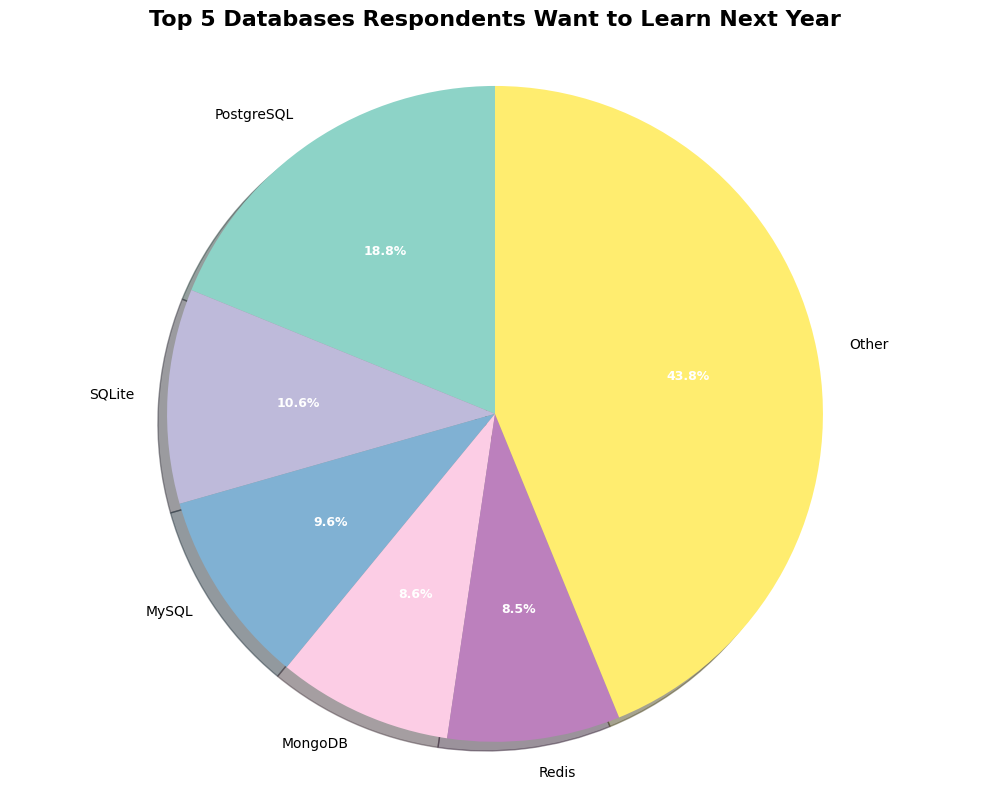


Total database preferences expressed: 127439
Unique databases mentioned: 35
Top 5 represent 56.2% of all preferences

Top 10 databases:
1. PostgreSQL: 24005
2. SQLite: 13489
3. MySQL: 12269
4. MongoDB: 10982
5. Redis: 10847
6. Microsoft SQL Server: 7905
7. Elasticsearch: 6246
8. MariaDB: 5947
9. Dynamodb: 3503
10. Supabase: 2930


In [31]:
# Create a pie chart of the top 5 databases respondents wish to learn next year
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('survey-data.csv')

# Display available columns to find the right one
print("Available columns:")
for col in df.columns:
    if 'database' in col.lower() or 'want' in col.lower() or 'work' in col.lower():
        print(f"Potential database column: {col}")

# Try to find the database column automatically
database_col = None
for col in df.columns:
    if 'database' in col.lower() and 'want' in col.lower():
        database_col = col
        break

# If not found, try other variations
if database_col is None:
    for col in df.columns:
        if 'database' in col.lower() or 'db' in col.lower():
            database_col = col
            break

# If still not found, use the first column that might contain database preferences
if database_col is None:
    for col in df.columns:
        if df[col].dtype == 'object' and any(keyword in str(df[col].iloc[0]).lower() for keyword in ['mysql', 'postgres', 'mongo', 'sql']):
            database_col = col
            break

# Final fallback - use a likely column name
if database_col is None:
    database_col = 'DatabaseWantToWorkWith'

print(f"\nUsing column: {database_col}")

# Check if column exists
if database_col not in df.columns:
    print(f"Column '{database_col}' not found. Available columns:")
    print(df.columns.tolist())
else:
    # Get the database preferences data
    db_data = df[database_col].dropna()
    print(f"\nTotal responses about databases: {len(db_data)}")
    
    # Split the database strings (they might be semicolon-separated lists)
    all_databases = []
    for db_string in db_data:
        # Split by semicolon, comma, or other separators and strip whitespace
        if ';' in str(db_string):
            databases = [db.strip() for db in str(db_string).split(';') if db.strip()]
        elif ',' in str(db_string):
            databases = [db.strip() for db in str(db_string).split(',') if db.strip()]
        else:
            databases = [str(db_string).strip()]
        all_databases.extend(databases)
    
    # Count frequency of each database
    db_counts = pd.Series(all_databases).value_counts()
    
    # Get top 5 databases
    top_5_db = db_counts.head(5)
    other_count = db_counts[5:].sum() if len(db_counts) > 5 else 0
    
    print("Top 5 databases respondents want to learn:")
    for i, (db, count) in enumerate(top_5_db.items(), 1):
        print(f"{i}. {db}: {count} respondents")
    
    if other_count > 0:
        print(f"Other databases: {other_count} respondents")
    
    # Create the pie chart
    plt.figure(figsize=(10, 8))
    
    # Prepare data for pie chart (top 5 + "Other")
    if other_count > 0:
        pie_data = pd.concat([top_5_db, pd.Series({'Other': other_count})])
    else:
        pie_data = top_5_db
    
    # Create colors
    colors = plt.cm.Set3(np.linspace(0, 1, len(pie_data)))
    
    # Create pie chart
    wedges, texts, autotexts = plt.pie(pie_data.values, 
                                       labels=pie_data.index, 
                                       autopct='%1.1f%%',
                                       colors=colors,
                                       startangle=90,
                                       shadow=True)
    
    # Style the chart
    plt.title('Top 5 Databases Respondents Want to Learn Next Year', 
              fontsize=16, fontweight='bold', pad=20)
    
    # Make labels more readable
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_fontweight('bold')
        autotext.set_color('white')
    
    plt.axis('equal')  # Ensure pie is circular
    plt.tight_layout()
    plt.show()
    
    # Additional statistics
    print(f"\nTotal database preferences expressed: {len(all_databases)}")
    print(f"Unique databases mentioned: {len(db_counts)}")
    print(f"Top 5 represent {top_5_db.sum()/len(all_databases)*100:.1f}% of all preferences")
    
    # Show top 10 for reference
    print("\nTop 10 databases:")
    for i, (db, count) in enumerate(db_counts.head(10).items(), 1):
        print(f"{i}. {db}: {count}")

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


Using columns:
Time Searching: TimeSearching
Time Answering: TimeAnswering
Age: Age

Data points for age groups 25-34 and 35-44: 20447
Age groups in filtered data: ['35-44 years old' '25-34 years old']

Median time values by age group:
               Age  Search_Minutes  Answer_Minutes
0  25-34 years old            45.0            45.0
1  35-44 years old            45.0            45.0


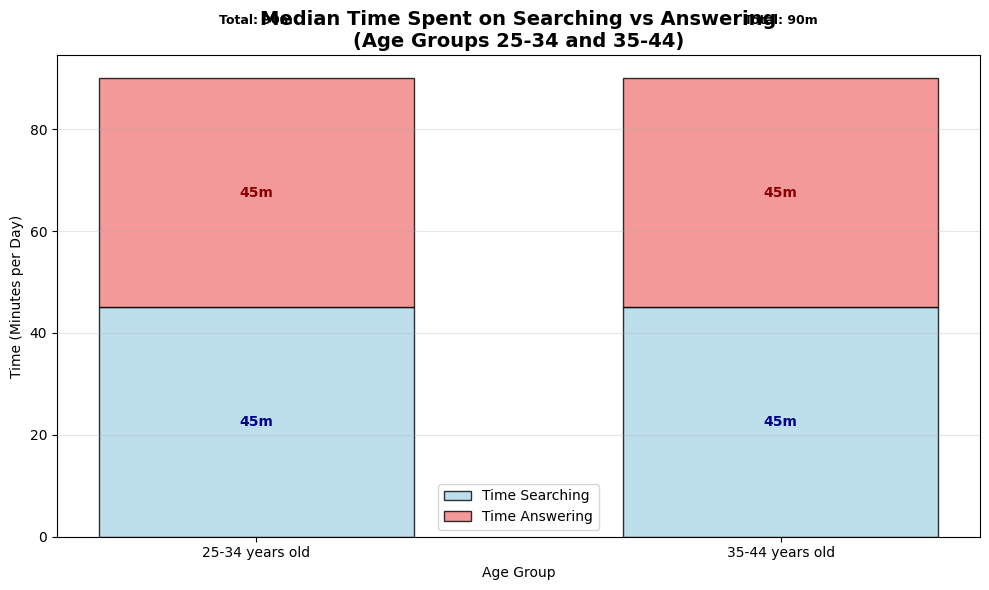


Overall median searching time: 45 minutes
Overall median answering time: 45 minutes
Total median time spent: 90 minutes

25-34 years old:
  Searching: 50.0% (45m)
  Answering: 50.0% (45m)
  Total: 90m

35-44 years old:
  Searching: 50.0% (45m)
  Answering: 50.0% (45m)
  Total: 90m


In [34]:
# Create a stacked bar chart of median TimeSearching and TimeAnswering for age group 30 to 35
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('survey-data.csv')

# Use the correct column names that we found
time_search_col = 'TimeSearching'
time_answer_col = 'TimeAnswering'
age_col = 'Age'  # Use the actual Age column

print(f"Using columns:")
print(f"Time Searching: {time_search_col}")
print(f"Time Answering: {time_answer_col}")
print(f"Age: {age_col}")

# Map time categories to numerical values (minutes)
time_mapping = {
    'Less than 30 minutes a day': 15,
    '30-60 minutes a day': 45,
    '1-2 hours a day': 90,
    '2-3 hours a day': 150,
    '3-4 hours a day': 210,
    '4-5 hours a day': 270,
    '5 or more hours a day': 300
}

# Filter for age groups around 30-35 (25-34 and 35-44)
age_groups_30_35 = ['25-34 years old', '35-44 years old']

# Prepare data - filter for the correct age groups and remove missing values
data = df[[time_search_col, time_answer_col, age_col]].dropna().copy()
data = data[data[age_col].isin(age_groups_30_35)]

print(f"\nData points for age groups 25-34 and 35-44: {len(data)}")

if len(data) > 0:
    # Show what age groups we actually have
    print(f"Age groups in filtered data: {data[age_col].unique()}")
    
    # Convert time categories to minutes
    data['Search_Minutes'] = data[time_search_col].map(time_mapping)
    data['Answer_Minutes'] = data[time_answer_col].map(time_mapping)
    
    # Calculate median values by age group
    median_values = data.groupby(age_col).agg({
        'Search_Minutes': 'median',
        'Answer_Minutes': 'median'
    }).reset_index()
    
    print("\nMedian time values by age group:")
    print(median_values)
    
    # Create stacked bar chart
    plt.figure(figsize=(10, 6))
    
    # Create stacked bars
    age_labels = median_values[age_col]
    search_values = median_values['Search_Minutes']
    answer_values = median_values['Answer_Minutes']
    
    # Stacked bars
    plt.bar(range(len(age_labels)), search_values, label='Time Searching', 
            color='lightblue', edgecolor='black', alpha=0.8, width=0.6)
    plt.bar(range(len(age_labels)), answer_values, bottom=search_values, 
            label='Time Answering', color='lightcoral', edgecolor='black', alpha=0.8, width=0.6)
    
    # Add value labels
    for i, (search_val, answer_val) in enumerate(zip(search_values, answer_values)):
        total = search_val + answer_val
        plt.text(i, search_val/2, f'{search_val:.0f}m', ha='center', va='center', 
                 fontweight='bold', fontsize=10, color='darkblue')
        plt.text(i, search_val + answer_val/2, f'{answer_val:.0f}m', ha='center', va='center', 
                 fontweight='bold', fontsize=10, color='darkred')
        plt.text(i, total + 10, f'Total: {total:.0f}m', ha='center', va='bottom', 
                 fontweight='bold', fontsize=9)
    
    # Customize chart
    plt.title('Median Time Spent on Searching vs Answering\n(Age Groups 25-34 and 35-44)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Age Group')
    plt.ylabel('Time (Minutes per Day)')
    plt.xticks(range(len(age_labels)), age_labels)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Additional statistics
    total_search_median = data['Search_Minutes'].median()
    total_answer_median = data['Answer_Minutes'].median()
    
    print(f"\nOverall median searching time: {total_search_median:.0f} minutes")
    print(f"Overall median answering time: {total_answer_median:.0f} minutes")
    print(f"Total median time spent: {total_search_median + total_answer_median:.0f} minutes")
    
    # Percentage breakdown
    for i, age_group in enumerate(age_labels):
        search_time = search_values.iloc[i]
        answer_time = answer_values.iloc[i]
        total_time = search_time + answer_time
        search_pct = (search_time / total_time) * 100
        answer_pct = (answer_time / total_time) * 100
        
        print(f"\n{age_group}:")
        print(f"  Searching: {search_pct:.1f}% ({search_time:.0f}m)")
        print(f"  Answering: {answer_pct:.1f}% ({answer_time:.0f}m)")
        print(f"  Total: {total_time:.0f}m")

else:
    print("No data available for the specified age groups.")
    print("Available age groups in the dataset:", df[age_col].dropna().unique())

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


Available columns:
Relevant column: Age
Relevant column: CompTotal
Relevant column: LanguageHaveWorkedWith
Relevant column: LanguageWantToWorkWith
Relevant column: LanguageAdmired
Relevant column: AIComplex
Relevant column: ConvertedCompYearly

Using columns:
Compensation: ConvertedCompYearly
Age: Age

Data points for age groups 45-60: 3192
Age groups in filtered data: ['45-54 years old' '55-64 years old']

Median compensation by age group:
               Age  ConvertedCompYearly
0  45-54 years old              99099.0
1  55-64 years old             109691.0


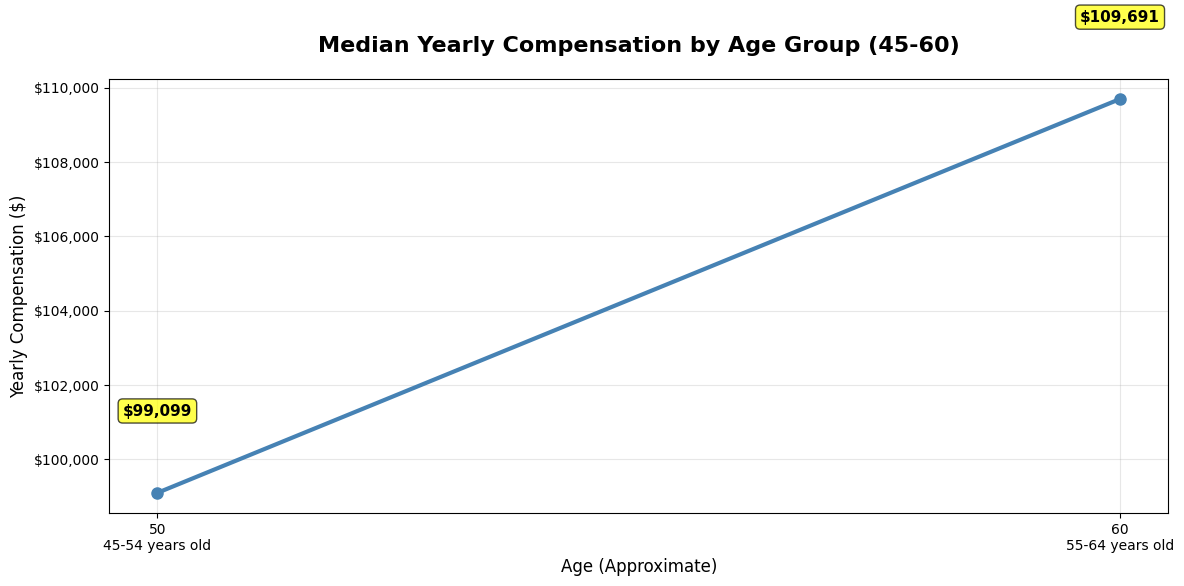


Overall median compensation for ages 45-60: $101,910
Percentage difference (45-54 vs 55-64): +10.7%

Compensation statistics for ages 45-60:
Mean: $120,438
Median: $101,910
Standard Deviation: $106,350
Minimum: $1
Maximum: $1,750,749


In [35]:
# Plot the median CompTotal for all ages from 45 to 60
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('survey-data.csv')

# Display available columns to find the right ones
print("Available columns:")
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['comp', 'salary', 'income', 'age']):
        print(f"Relevant column: {col}")

# Use the correct column names
comp_col = 'ConvertedCompYearly'  # This is the compensation column
age_col = 'Age'  # This is the age column

print(f"\nUsing columns:")
print(f"Compensation: {comp_col}")
print(f"Age: {age_col}")

# Check if columns exist
if comp_col not in df.columns or age_col not in df.columns:
    print("Error: Required columns not found!")
    print("Available columns:", df.columns.tolist())
else:
    # Prepare data - filter for ages 45-60 and remove missing values
    # Age groups that correspond to 45-60: 45-54 years old and 55-64 years old
    age_groups_45_60 = ['45-54 years old', '55-64 years old']
    
    data = df[[comp_col, age_col]].dropna().copy()
    data = data[data[age_col].isin(age_groups_45_60)]
    
    print(f"\nData points for age groups 45-60: {len(data)}")
    
    if len(data) > 0:
        # Show what age groups we have
        print(f"Age groups in filtered data: {data[age_col].unique()}")
        
        # Calculate median compensation by age group
        median_comp = data.groupby(age_col)[comp_col].median().reset_index()
        
        print("\nMedian compensation by age group:")
        print(median_comp)
        
        # Map age categories to numerical values for the line chart
        age_mapping = {
            '45-54 years old': 50,  # Midpoint of 45-54
            '55-64 years old': 60   # Midpoint of 55-64
        }
        
        median_comp['Age_Numeric'] = median_comp[age_col].map(age_mapping)
        median_comp = median_comp.sort_values('Age_Numeric')
        
        # Create line chart
        plt.figure(figsize=(12, 6))
        
        # Plot the line
        plt.plot(median_comp['Age_Numeric'], median_comp[comp_col], 
                marker='o', linewidth=3, markersize=8, color='steelblue')
        
        # Add value labels
        for i, row in median_comp.iterrows():
            plt.text(row['Age_Numeric'], row[comp_col] + 2000, 
                    f'${row[comp_col]:,.0f}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=11,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
        
        # Customize chart
        plt.title('Median Yearly Compensation by Age Group (45-60)', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Age (Approximate)', fontsize=12)
        plt.ylabel('Yearly Compensation ($)', fontsize=12)
        
        # Format y-axis with dollar signs
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
        
        # Set x-ticks to show both numerical and categorical labels
        plt.xticks(median_comp['Age_Numeric'], 
                  [f'{age_num}\n{age_cat}' for age_num, age_cat in zip(median_comp['Age_Numeric'], median_comp[age_col])])
        
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Additional statistics
        print(f"\nOverall median compensation for ages 45-60: ${data[comp_col].median():,.0f}")
        
        # Calculate percentage difference between age groups
        if len(median_comp) > 1:
            comp_45_54 = median_comp[median_comp[age_col] == '45-54 years old'][comp_col].values[0]
            comp_55_64 = median_comp[median_comp[age_col] == '55-64 years old'][comp_col].values[0]
            
            percentage_diff = ((comp_55_64 - comp_45_54) / comp_45_54) * 100
            print(f"Percentage difference (45-54 vs 55-64): {percentage_diff:+.1f}%")
        
        # Show distribution statistics
        print(f"\nCompensation statistics for ages 45-60:")
        print(f"Mean: ${data[comp_col].mean():,.0f}")
        print(f"Median: ${data[comp_col].median():,.0f}")
        print(f"Standard Deviation: ${data[comp_col].std():,.0f}")
        print(f"Minimum: ${data[comp_col].min():,.0f}")
        print(f"Maximum: ${data[comp_col].max():,.0f}")
        
    else:
        print("No data available for the specified age groups.")
        print("Available age groups:", df[age_col].dropna().unique())

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


Available columns:
Potential MainBranch column: MainBranch
Potential MainBranch column: TBranch

Using column: MainBranch

Total responses: 65437
Distribution of roles/branches:
I am a developer by profession: 50207 respondents (76.7%)
I am not primarily a developer, but I write code sometimes as part of my work/studies: 6511 respondents (10.0%)
I am learning to code: 3875 respondents (5.9%)
I code primarily as a hobby: 3334 respondents (5.1%)
I used to be a developer by profession, but no longer am: 1510 respondents (2.3%)


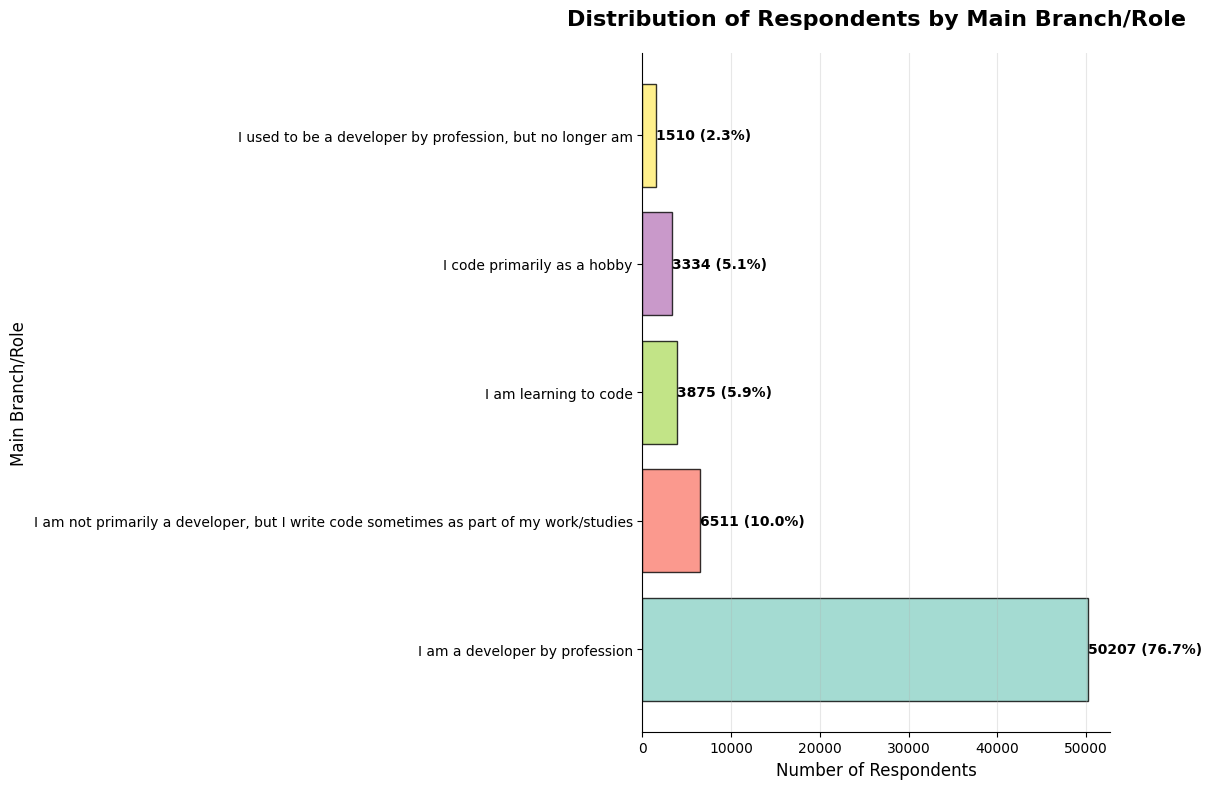


Total number of respondents: 65437
Number of unique roles/branches: 5
Most common role: I am a developer by profession (50207 respondents)
Least common role: I used to be a developer by profession, but no longer am (1510 respondents)
Diversity index: 39.5% (higher = more diverse)


In [36]:
# Create a horizontal bar chart using the MainBranch column
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('survey-data.csv')

# Display available columns to find the right one
print("Available columns:")
for col in df.columns:
    if 'main' in col.lower() or 'branch' in col.lower() or 'role' in col.lower():
        print(f"Potential MainBranch column: {col}")

# Try to find the MainBranch column automatically
main_branch_col = None
for col in df.columns:
    if 'main' in col.lower() and 'branch' in col.lower():
        main_branch_col = col
        break

# If not found, try other variations
if main_branch_col is None:
    for col in df.columns:
        if 'role' in col.lower() or 'position' in col.lower() or 'title' in col.lower():
            main_branch_col = col
            break

# Final fallback
if main_branch_col is None:
    main_branch_col = 'MainBranch'

print(f"\nUsing column: {main_branch_col}")

# Check if column exists
if main_branch_col not in df.columns:
    print(f"Column '{main_branch_col}' not found. Available columns:")
    print(df.columns.tolist())
else:
    # Get the MainBranch data
    branch_data = df[main_branch_col].dropna()
    print(f"\nTotal responses: {len(branch_data)}")
    
    # Count frequency of each branch/role
    branch_counts = branch_data.value_counts()
    
    print("Distribution of roles/branches:")
    for branch, count in branch_counts.items():
        print(f"{branch}: {count} respondents ({count/len(branch_data)*100:.1f}%)")
    
    # Create horizontal bar chart
    plt.figure(figsize=(12, 8))
    
    # Create horizontal bars
    bars = plt.barh(range(len(branch_counts)), branch_counts.values, 
                   color=plt.cm.Set3(np.linspace(0, 1, len(branch_counts))),
                   alpha=0.8, edgecolor='black')
    
    # Customize the chart
    plt.title('Distribution of Respondents by Main Branch/Role', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Number of Respondents', fontsize=12)
    plt.ylabel('Main Branch/Role', fontsize=12)
    plt.yticks(range(len(branch_counts)), branch_counts.index)
    
    # Add value labels on the bars
    for i, (branch, count) in enumerate(branch_counts.items()):
        percentage = (count / len(branch_data)) * 100
        plt.text(count + 5, i, f'{count} ({percentage:.1f}%)', 
                va='center', fontweight='bold', fontsize=10)
    
    # Add grid
    plt.grid(True, alpha=0.3, axis='x')
    
    # Remove spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Additional statistics
    print(f"\nTotal number of respondents: {len(branch_data)}")
    print(f"Number of unique roles/branches: {len(branch_counts)}")
    print(f"Most common role: {branch_counts.idxmax()} ({branch_counts.max()} respondents)")
    print(f"Least common role: {branch_counts.idxmin()} ({branch_counts.min()} respondents)")
    
    # Calculate diversity index (simplified)
    if len(branch_counts) > 1:
        diversity_index = (1 - sum((count/len(branch_data))**2 for count in branch_counts.values)) * 100
        print(f"Diversity index: {diversity_index:.1f}% (higher = more diverse)")
    
    # Show top 10 if there are many categories
    if len(branch_counts) > 10:
        print(f"\nTop 10 roles/branches:")
        for i, (branch, count) in enumerate(branch_counts.head(10).items(), 1):
            percentage = (count / len(branch_data)) * 100
            print(f"{i}. {branch}: {count} ({percentage:.1f}%)")

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [18]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
